In [1]:
%pylab inline
%config InlineBackend.figure_format ='retina'

import time

import anndata
import matplotlib.colors as mcolors
import pandas as pd

import plotnine as p

Populating the interactive namespace from numpy and matplotlib


In [2]:
Z_df = pd.read_csv('pij_vae_results\ldvae_2_Z.csv', index_col=0)
W_df = pd.read_csv('pij_vae_results\ldvae_2_W.csv', index_col=0)

In [3]:
Z_df = Z_df.add_prefix('z')
W_df = W_df.add_prefix('w')

In [4]:
def Z_covariance(Z):
    Zcentered = Z - Z.mean(0)
    Zscaled = Z / Z.std(0)
    ZTZ = np.cov(Zscaled.T)
    
    eigen_values, _ = np.linalg.eig(ZTZ)
    singular_values = np.sqrt(eigen_values)
    variance_explained = singular_values / singular_values.sum()

    return ZTZ, variance_explained

In [5]:
_, variance_explained = Z_covariance(Z_df)
idx = np.argsort(variance_explained)[::-1]

In [6]:
variance_explained

array([7.81025405e-02, 7.35011965e-02, 3.08614378e-09, 6.63227855e-02,
       3.16876421e-02, 6.23653142e-02, 6.09987800e-02, 3.61282318e-02,
       5.84300032e-02, 5.68723953e-02, 5.58985546e-02, 5.37002709e-02,
       5.17210051e-02, 4.03089028e-02, 4.16244821e-02, 4.28796070e-02,
       4.48938615e-02, 4.86937586e-02, 4.76690123e-02, 4.82016530e-02])

In [7]:
Z_df_ordered = pd.DataFrame(Z_df.values[:, idx]).add_prefix('z')
Z_df_ordered.index = Z_df.index
W_df_ordered = pd.DataFrame(W_df.values[:, idx]).add_prefix('w')
W_df_ordered.index = W_df.index

In [8]:
adata = anndata.read('pijuan_sala_atlas.h5ad')

In [9]:
W_df_ordered = adata.var.loc[W_df_ordered.index].join(W_df_ordered)

In [88]:
text_shift = {
    (0, 'Trh'): (3, -0.0),
    (0, 'Srgn'): (0.0, -1),
    
    (1, 'Srgn'): (2., -0.0),
    (1, 'Mesp1'): (0, 2.3),
    (1, 'Hbb-bt'): (-7, 0),
    (1, 'Hbb-bs'): (0, 2),

    
    (2, 'Hbb-y'): (0.0, 2),
    (2, 'Dab2'): (-4, 0),
    (2, 'Cited4'): (2, 1),
    (2, 'Apoa4'): (2, 0.0),
    
    (3, 'Tmem37'): (0.0, 2),
    (3, 'Tnnt2'): (0, 2),
    (3, 'Actc1'): (0, 2.0),
    (3, 'Cer1'): (0, 2.0),
#     (3, 'T'): (0.0, 0.2),
#     (3, 'Ifitm1'): (-0.2, 0.0),
#     (3, 'Rspo2'): (-0.3, 0.0),
#     (3, 'Htr2c'): (0.6, 0.1),
#     (3, 'Col1a1'): (0.0, 0.2),
    
#     (4, 'Ttn'): (0.0, -0.4),
#     (4, 'Sntb1'): (0.0, -0.3),
#     (4, 'Colec12'): (-1.1, 0.1),
#     (4, 'Adam12'): (0.1, 0.4),
#     (4, 'Spon1'): (0.0, 0.2),
#     (4, 'Gm3764'): (-0.2, 0.3),
#     (4, 'C130071C03Rik'): (1.5, -0.35),
    
}

[Cer1, Trh, Spink1, Srgn, Amn, Apoa4, T, Cited4]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Srgn, Ptn, Hbb-bs, Mesp1, Hbb-bt, Trh, Phlda2, Hand1]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Amn, Apoa4, Hbb-y, Dab2, Cited4, Car7, Hba-x, Ctsh]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Cer1, Apoa4, Acta2, Tmem37, Tnnt2, Amn, Actc1, Myl4]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Hoxaas3, Cdx1, Hbb-bs, Hbb-bt, Cdx2, T, Hba-a2, Hbb-y]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]


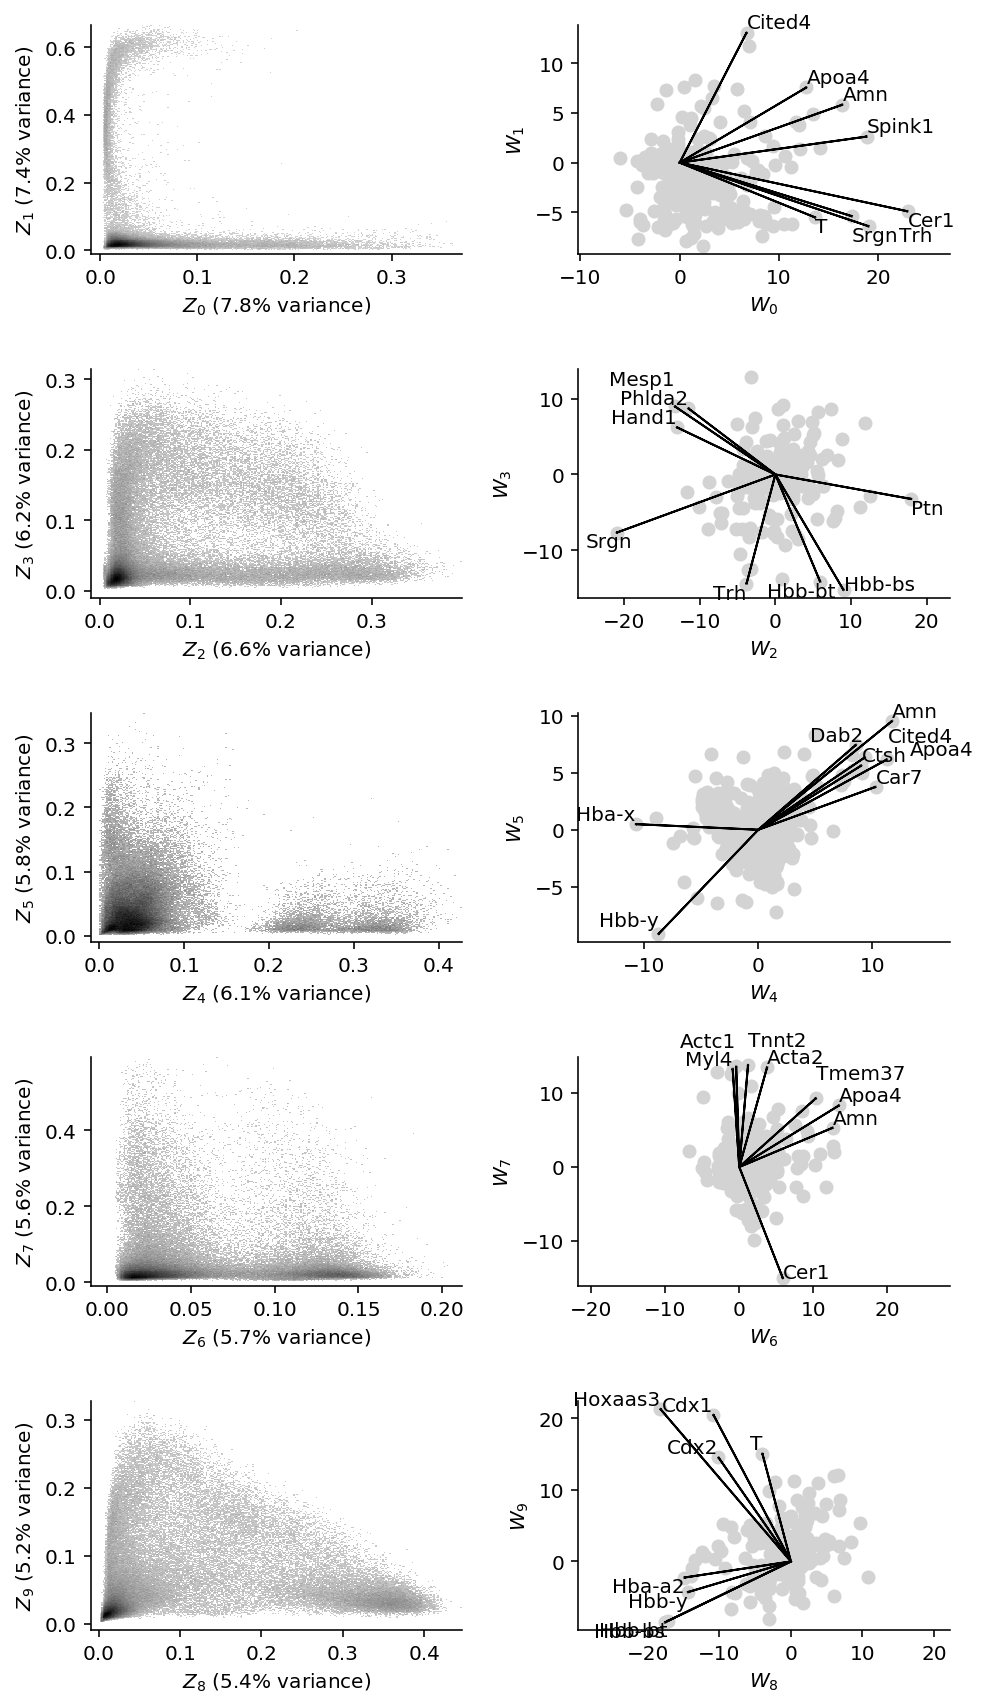

In [90]:
figsize(7, 12)
for i in range(5):
    
    # -- Z plot --
    
    plt.subplot(5, 2, 2 * i + 1)
    
    plt.hist2d(
        Z_df_ordered[f'z{2 * i}'], Z_df_ordered[f'z{2 * i + 1}'],
        bins=256,
        norm=mcolors.PowerNorm(0.25),
        cmap=cm.gray_r,
        rasterized=True
    )

    plt.xlabel(f'$Z_{2 * i}$ ({variance_explained[idx][2 * i]:.1%} variance)')
    plt.ylabel(f'$Z_{2 * i + 1}$ ({variance_explained[idx][2 * i + 1]:.1%} variance)')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xlim(left=-0.01)
    plt.ylim(bottom=-0.01)
    
    # -- W plot --
    
    plt.subplot(5, 2, 2 * i + 2)
    
    w_columns = [f'w{2 * i}', f'w{2 * i + 1}']
    
    plt.scatter(
        W_df_ordered[w_columns[0]], W_df_ordered[w_columns[1]],
        c='lightgrey',
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$W_{2 * i}$')
    plt.ylabel(f'$W_{2 * i + 1}$')
    
    tmp_ = W_df_ordered.copy()
    tmp_['lnth'] = np.linalg.norm(tmp_[w_columns], axis=1)
    
    ggg = (
        tmp_
        .sort_values('lnth', ascending=False)
        .head(8)[['gene_name', 'lnth', *w_columns]]
    )
    print(ggg['gene_name'].values)
    
    texts = []
    arrows = []
    for g, r in ggg.iterrows():
        x_, y_ = r[w_columns[0]], r[w_columns[1]]
        
        ha = 'right'
        if x_ > 0:
            ha = 'left'
            
        va = 'top'
        if y_ > 0:
            va = 'bottom'
            
        arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True))
        
        xs, ys = 0, 0
        if (i, r.gene_name) in text_shift:
            xs, ys = text_shift[(i, r.gene_name)]
        
        texts.append(plt.text(x_ + xs, y_ + ys, r.gene_name, ha=ha, va=va))
       
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()
plt.savefig('figures/linear_pij_results_nonnegative.pdf', bbox_inches='tight', dpi=400)

In [13]:
metadata = adata.obs.loc[Z_df_ordered.index]

In [14]:
metadata = metadata.join(Z_df_ordered)

In [15]:
metadata.head().T

index,cell_1,cell_2,cell_3,cell_4,cell_5
barcode,AAAGGCCTCCACAA,AACAAACTCGCCTT,AACAATACCCGTAA,AACACTCTCATTCT,AACAGAGAATCAGC
sample,1,1,1,1,1
stage,E6.5,E6.5,E6.5,E6.5,E6.5
sequencing.batch,1,1,1,1,1
theiler,TS9,TS9,TS9,TS9,TS9
doub.density,0.0431142,1.12971,0,0.0846885,0.112121
doublet,False,False,False,False,False
cluster,2,12,NaN,NaN,3
cluster.sub,4,1,NaN,NaN,7
cluster.stage,2,1,NaN,NaN,4


In [16]:
for ctype in np.unique(metadata['celltype']):
    z_corrs = Z_df_ordered.corrwith((metadata['celltype'] == ctype))
    top_factors = z_corrs.map(np.abs).sort_values(ascending=False).head(3)
    print([f'{z.rjust(3)}: {z_corrs[z]:+.2f}' for z in top_factors.index], ctype)

['z11: +0.26', ' z7: +0.26', ' z3: +0.18'] Allantois
['z12: +0.26', ' z0: +0.07', ' z8: +0.06'] Anterior Primitive Streak
['z19: +0.29', ' z4: +0.05', ' z8: -0.05'] Blood progenitors 1
['z19: +0.45', ' z1: +0.23', ' z8: -0.10'] Blood progenitors 2
[' z7: +0.39', ' z3: +0.10', ' z8: -0.07'] Cardiomyocytes
[' z9: +0.29', ' z6: +0.05', ' z8: -0.04'] Caudal Mesoderm
[' z9: +0.42', ' z3: -0.05', 'z10: -0.05'] Caudal epiblast
[' z9: +0.20', 'z14: +0.10', ' z3: -0.04'] Caudal neurectoderm
[' z0: +0.23', 'z12: +0.12', 'z18: +0.06'] Def. endoderm
['z19: +0.45', ' z7: +0.26', 'z11: -0.09'] Endothelium
[' z8: +0.76', ' z2: -0.20', ' z3: -0.20'] Epiblast
[' z1: +0.47', 'z19: +0.23', ' z9: -0.11'] Erythroid1
[' z1: +0.37', ' z9: -0.07', ' z8: -0.07'] Erythroid2
[' z1: +0.67', ' z5: -0.12', ' z9: -0.11'] Erythroid3
['z15: +0.97', ' z9: -0.21', ' z8: -0.19'] ExE ectoderm
['z10: +0.89', ' z9: -0.20', ' z8: -0.19'] ExE endoderm
[' z3: +0.28', 'z11: +0.23', ' z8: -0.10'] ExE mesoderm
[' z2: +0.54', ' z3

In [21]:
vardata = W_df_ordered

In [22]:
from matplotlib.patches import Ellipse

In [23]:
from scipy import stats

In [24]:
def make_kde(x1, x2):
    dx1 = (x1.max() - x1.min()) / 10
    dx2 = (x2.max() - x2.min()) / 10

    x1min = x1.min() - dx1
    x2min = x2.min() - dx2
    x1max = x1.max() + dx1
    x2max = x2.max() + dx2

    xx1, xx2 = np.mgrid[x1min:x1max:100j, x2min:x2max:100j]

    positions = np.vstack([xx1.ravel(), xx2.ravel()])
    values = np.vstack([x1, x2])

    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx1.shape)
    
    return xx1, xx2, f

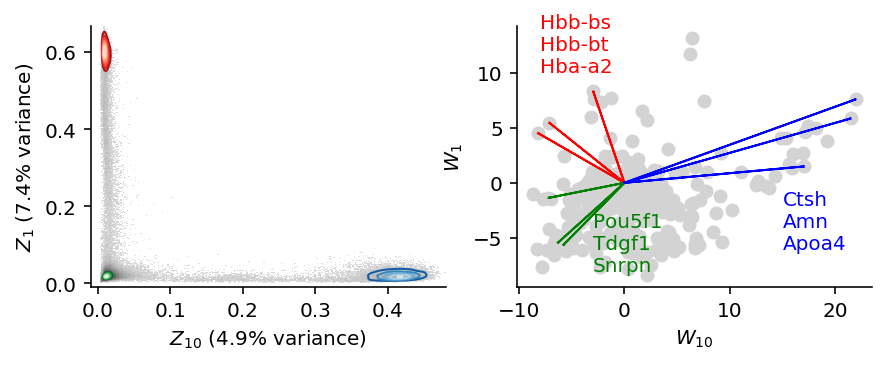

In [91]:
figsize(7, 12 / 5)

plt.subplot(1, 2, 1)

plt.hist2d(
    Z_df_ordered[f'z10'], Z_df_ordered[f'z1'],
    bins=256,
    norm=mcolors.PowerNorm(0.25),
    cmap=cm.gray_r,
    rasterized=True
)

plt.xlabel('$Z_{10}$ ' + f'({variance_explained[idx][10]:.1%} variance)')
plt.ylabel('$Z_{1}$ ' + f'({variance_explained[idx][1]:.1%} variance)')

plt.xlim(left=-0.01)
plt.ylim(bottom=-0.01)

ax = plt.gca()

color_maps = [cm.Reds_r, cm.Blues_r, cm.Greens_r]
cell_types = ['Erythroid3', 'ExE endoderm', 'Epiblast']
for color, ctype in zip(color_maps, cell_types):
    X = metadata.query('celltype == @ctype')[['z10', 'z1']]
    xx1, xx2, f = make_kde(X['z10'], X['z1'])
    cset = ax.contour(
        xx1,
        xx2,
        f,
        levels=6,
        cmap=color,
        linewidths=1.
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(1, 2, 2)

plt.scatter(
    W_df_ordered['w10'], W_df_ordered['w1'],
    c='lightgrey',
    rasterized=True
)


arrows = []
genes = ['Hbb-bs', 'Hbb-bt', 'Hba-a2']
for g in genes:
    x_, y_ = vardata.query('gene_name == @g')[['w10', 'w1']].values[0]

    arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True, color='r'))
    
plt.text(-8, 10, '\n'.join(genes), color='r')

arrows = []
genes = ['Pou5f1', 'Tdgf1', 'Snrpn']
for g in genes:
    x_, y_ = vardata.query('gene_name == @g')[['w10', 'w1']].values[0]

    arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True, color='g'))

plt.text(-3, -8, '\n'.join(genes), color='g')

arrows = []
genes = ['Ctsh', 'Amn', 'Apoa4']
for g in genes:
    x_, y_ = vardata.query('gene_name == @g')[['w10', 'w1']].values[0]

    arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True, color='b'))

plt.text(15, -6, '\n'.join(genes), color='b')


# plt.xlim(left=-3, right=3)
# plt.ylim(bottom=-3, top=3)

plt.xlabel('$W_{10}$')
plt.ylabel('$W_{1}$')

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figures/linear_pij_results_celltypes_nonnegative.pdf', bbox_inches='tight', dpi=400)

In [92]:
vardata.sort_values('w1', ascending=False)[['w17', 'gene_name']].head(10)

,w17,gene_name
ENSMUSG00000070803,9.529948,Cited4
ENSMUSG00000040466,5.161056,Blvrb
ENSMUSG00000069917,3.401303,Hba-a2
ENSMUSG00000052187,-0.233539,Hbb-y
ENSMUSG00000069919,2.938663,Hba-a1
ENSMUSG00000032080,7.280273,Apoa4
ENSMUSG00000026688,-0.475775,Mgst3
ENSMUSG00000055609,2.330047,Hba-x
ENSMUSG00000028393,2.893063,Alad
ENSMUSG00000052217,2.752512,Hbb-bh1


In [93]:
vardata.sort_values('w10', ascending=False)[['w2', 'gene_name']].head(10)

,w2,gene_name
ENSMUSG00000032080,7.397807,Apoa4
ENSMUSG00000021278,3.044138,Amn
ENSMUSG00000024391,2.497312,Apom
ENSMUSG00000061808,4.544076,Ttr
ENSMUSG00000050777,6.829978,Tmem37
ENSMUSG00000031883,5.029221,Car7
ENSMUSG00000032359,0.562084,Ctsh
ENSMUSG00000032083,0.565437,Apoa1
ENSMUSG00000024503,1.015293,Spink1
ENSMUSG00000001827,4.296632,Folr1
